In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy import distance

In [2]:
# This data can be downloaded from
# https://www.paoilandgasreporting.state.pa.us/publicreports/Modules/Welcome/Agreement.aspx
# Agree to the statement, select "Production/Waste Reports"
# and then select "Waste Report"
# Select the desired months.  This data file was selected from all of 2018

waste = pd.read_csv('Well Waste 2018.csv', encoding='iso-8859-1',
                    low_memory=False)

In [3]:
# Basic data and column reformatting
waste.rename(str.lower, axis='columns', inplace=True)
waste.rename(columns={'units': 'waste_unit'}, inplace=True)
waste.waste_unit = waste.waste_unit.astype(str)
waste[['waste_quantity']] = waste[['waste_quantity']].astype(float)
waste.waste_facility_name = waste.waste_facility_name.fillna("")
waste.waste_type = waste.waste_type.str.split("(").str[0]

In [4]:
# Creates two new columns to separate the waste quantities
# into solid and liquid
waste['solid_waste'] = 0
waste['liquid_waste'] = 0

# Moves values with "Tons" as a waste unit into 'solid_waste'
waste.loc[waste.waste_unit == 'Tons', 'solid_waste'] = (
        waste.waste_quantity[waste.waste_unit == 'Tons'])

# Moves values with "Bbl" as a waste unit into 'liquid_waste'
waste.loc[waste.waste_unit == 'Bbl', 'liquid_waste'] = (
        waste.waste_quantity[waste.waste_unit == 'Bbl'])

# Removes the original 'waste_quantity' column
waste = waste.drop(columns=['waste_quantity'])

In [5]:
# Fills in the well pad's geolocation as the facility geolocation
# when the well pad is the recipient of the waste produced

waste.loc[waste.disposal_method == 'REUSE (AT WELL PAD)',
          'facility_latitude'] = (
          waste.well_pad_latitude[
                  waste.disposal_method == 'REUSE (AT WELL PAD)'])
waste.loc[waste.disposal_method == 'REUSE (AT WELL PAD)',
          'facility_longitude'] = (
          waste.well_pad_longitude[
                  waste.disposal_method == 'REUSE (AT WELL PAD)'])

In [6]:
# Fills in a somewhat arbitrary location
# for waste transported out of Pennsylvania
# The Ohio and West Virginia locations are in the general region
# of significant oil and gas production

waste.loc[waste.waste_facility_name ==
          'REUSE AT OHIO WELL PAD', 'facility_latitude'] = 40
waste.loc[waste.waste_facility_name ==
          'REUSE AT OHIO WELL PAD', 'facility_longitude'] = -81

waste.loc[waste.waste_facility_name ==
          'REUSE AT TEXAS WELL PAD', 'facility_latitude'] = 32
waste.loc[waste.waste_facility_name ==
          'REUSE AT TEXAS WELL PAD', 'facility_longitude'] = -95

waste.loc[waste.waste_facility_name ==
          'REUSE AT VIRGINIA WELL PAD', 'facility_latitude'] = 37
waste.loc[waste.waste_facility_name ==
          'REUSE AT VIRGINIA WELL PAD', 'facility_longitude'] = -81

waste.loc[waste.waste_facility_name ==
          'REUSE AT WEST VIRGINIA WELL PAD', 'facility_latitude'] = 39.6
waste.loc[waste.waste_facility_name ==
          'REUSE AT WEST VIRGINIA WELL PAD', 'facility_longitude'] = -81

waste.loc[waste.waste_facility_name ==
          'REUSE AT WYOMING WELL PAD', 'facility_latitude'] = 42
waste.loc[waste.waste_facility_name ==
          'REUSE AT WYOMING WELL PAD', 'facility_longitude'] = -105


In [7]:
# Replace the period ID with standard year-month format
waste.loc[waste.period_id == '18JANW', 'period_id'] = '2018-01'
waste.loc[waste.period_id == '18FEBW', 'period_id'] = '2018-02'
waste.loc[waste.period_id == '18MARW', 'period_id'] = '2018-03'
waste.loc[waste.period_id == '18APRW', 'period_id'] = '2018-04'
waste.loc[waste.period_id == '18MAYW', 'period_id'] = '2018-05'
waste.loc[waste.period_id == '18JUNW', 'period_id'] = '2018-06'
waste.loc[waste.period_id == '18JULW', 'period_id'] = '2018-07'
waste.loc[waste.period_id == '18AUGW', 'period_id'] = '2018-08'
waste.loc[waste.period_id == '18SEPW', 'period_id'] = '2018-09'
waste.loc[waste.period_id == '18OCTW', 'period_id'] = '2018-10'
waste.loc[waste.period_id == '18NOVW', 'period_id'] = '2018-11'
waste.loc[waste.period_id == '18DECW', 'period_id'] = '2018-12'

Text(0.5, 0, 'Disposal Method')

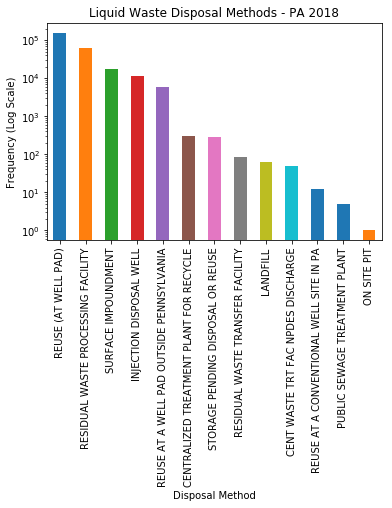

In [8]:
# Selects the data with liquid waste and plots the frequency of each
# disposal method
liquid_only = waste.loc[waste.liquid_waste > 0]
liquid_count = liquid_only.groupby('disposal_method').count()
liquid_count = liquid_count.sort_values(by=['liquid_waste'], ascending=False)

liquid_count.liquid_waste.plot(kind='bar')
plt.yscale('log')
plt.title('Liquid Waste Disposal Methods - PA 2018')
plt.ylabel('Frequency (Log Scale)')
plt.xlabel('Disposal Method')

Text(0.5, 0, 'Disposal Method')

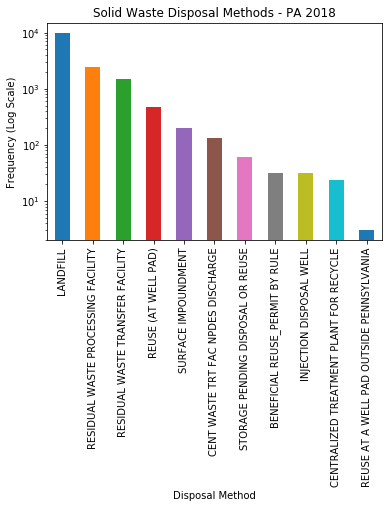

In [9]:
# Selects the data with solid waste and plots the frequency of each
# disposal method
solid_only = waste.loc[waste.solid_waste > 0]
solid_count = solid_only.groupby('disposal_method').count()
solid_count = solid_count.sort_values(by=['solid_waste'], ascending=False)

solid_count.solid_waste.plot(kind='bar')
plt.yscale('log')
plt.title('Solid Waste Disposal Methods - PA 2018')
plt.ylabel('Frequency (Log Scale)')
plt.xlabel('Disposal Method')